In [2]:
import numpy as np
import pandas as pd

veri = pd.read_excel (r'C:\Users\Pelin\Desktop\marketing_campaign2.xlsx')

In [3]:
print(veri)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome          Dt_Customer  Recency  MntWines  ...  \
0            0  2012-04-09 00:00:00       58       635  ...   
1        

In [4]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

Aşağıdaki kod parçasında içeriye aktarılan verinin data frame haline getirilme işlemi ve cerceve adlı değişkene atama işlemi gerçekleştirilmiştir. 

Gereksiz olduğunu düşündüğüm ID ve Dt_Customer değişkenlerinin veri stinden çıkarılma işlemi de gerçekleştirilmiştir.

In [5]:
cerceve = pd.DataFrame(veri)
cerceve.drop(columns=["ID","Dt_Customer"], inplace= True)
cerceve

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,46,709,43,182,...,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014.0,2,1,56,406,0,30,...,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,...,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245.0,0,1,8,428,30,214,...,3,0,0,0,0,0,0,3,11,0


Aşağıda hangi değişkenlerde eksik veya kayıp değerlerin olduğuna bakılmıştır ve bunun sonucunda Income değişkeninde 24 tane kayıp gözlem olduğu bulunmuştur

In [6]:
cerceve.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Eksik değerleri veri setinden çıkararak veri kaybetmek yerine aşağıdaki kod bir veri çerçevesindeki eksik gelir değerlerini, eğitim ve medeni duruma göre gruplayarak her gruptaki ortalama gelir değeriyle doldurma işlemi gerçekleştirilmiştir.

In [7]:
eksik_degerler=cerceve.groupby(["Education","Marital_Status"])["Income"].transform("mean").round(0)
cerceve["Income"].fillna(eksik_degerler, inplace= True)

In [8]:
cerceve.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [9]:
cerceve.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52248.747768,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25039.981164,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Aşağıdaki kod `cerceve` veri çerçevesindeki yinelenen satır sayısını bulur. Yani, veri çerçevesindeki herhangi bir satırın daha önceki satırlarla aynı olup olmadığını kontrol eder ve yinelenen satırların sayısını hesaplar.

In [10]:
cerceve.duplicated().sum()

182

Bu kod, `cerceve` veri çerçevesindeki yinelenen satırları kaldırır. Yani, veri çerçevesinde aynı olan satırlardan birini tutar ve diğerlerini kaldırır. `inplace=True` parametresi, bu değişikliğin `cerceve` veri çerçevesinde doğrudan yapılmasını sağlar.

In [11]:
cerceve.drop_duplicates(inplace=True)

Aşağıda aykırı değer incelemesi yapılarak 'Income' değişkenindeki aykırı değerlerin temizlenerek yeni bir değişkene aatanması sağlanmıştır.

In [12]:
import pandas as pd
print(type(cerceve))
Q1 = cerceve['Income'].quantile(0.25)
Q3 = cerceve['Income'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

print(alt_sinir)
print(ust_sinir)

temiz_veri =cerceve[~((cerceve['Income'] < (alt_sinir)) | (cerceve['Income'] > (ust_sinir)))]
print(temiz_veri)
print(temiz_veri.describe().T)

<class 'pandas.core.frame.DataFrame'>
-13109.375
117053.625
      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2232        1986  Graduation         Single  26816.0        0         0   
2235        1967  Graduation        Married  61223.0        0         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  Mnt

Aşağıda bir kaç değişkenin histogram grafiği çizdirilerek görselleştirme işlemi yapılmıştır.

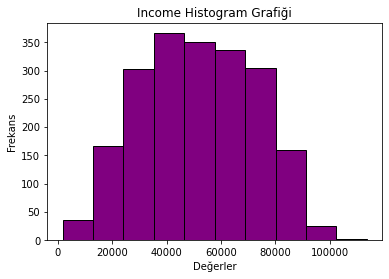

In [13]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(temiz_veri['Income'], bins=10, color='purple', edgecolor='black')
plt.title('Income Histogram Grafiği')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()

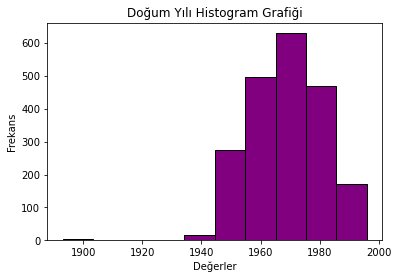

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(cerceve['Year_Birth'], bins=10, color='purple', edgecolor='black')
plt.title('Doğum Yılı Histogram Grafiği')
plt.xlabel('Değerler')
plt.ylabel('Frekans')
plt.show()

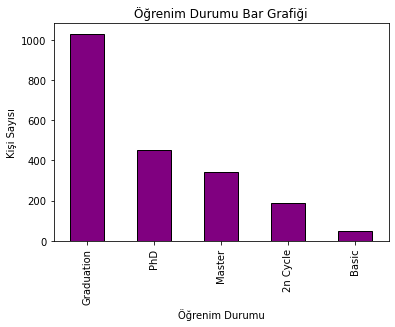

In [15]:
import matplotlib.pyplot as plt

ogrenim_durumu_sayisi = cerceve['Education'].value_counts()

ogrenim_durumu_sayisi.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Öğrenim Durumu Bar Grafiği')
plt.xlabel('Öğrenim Durumu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=90)
plt.show()


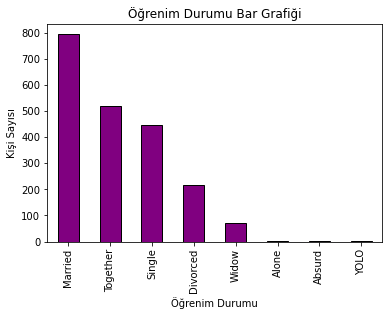

In [16]:
import matplotlib.pyplot as plt

ogrenim_durumu_sayisi = cerceve['Marital_Status'].value_counts()

ogrenim_durumu_sayisi.plot(kind='bar', color='purple', edgecolor='black')

plt.title('Öğrenim Durumu Bar Grafiği')
plt.xlabel('Öğrenim Durumu')
plt.ylabel('Kişi Sayısı')
plt.xticks(rotation=90)
plt.show()

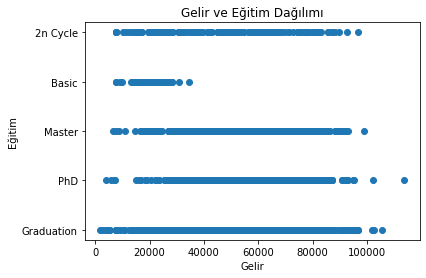

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

plt.scatter(temiz_veri['Income'], temiz_veri['Education'])
plt.xlabel('Gelir')
plt.ylabel('Eğitim')
plt.title('Gelir ve Eğitim Dağılımı')
plt.show()


Aşağıdaki Income değişkenine ait boxplot graifiğinde aykırı değer görülmemektedir.

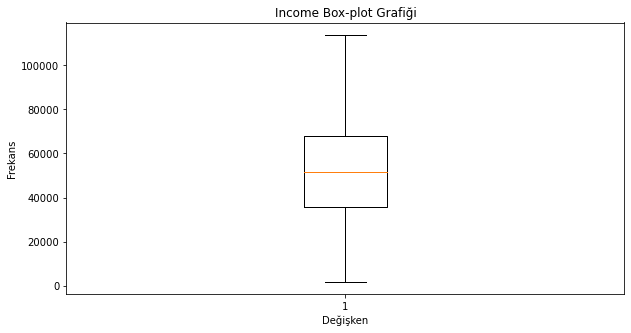

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

figure = plt.figure(figsize=(10,5))

plt.boxplot(temiz_veri['Income'])
plt.title('Income Box-plot Grafiği')
plt.xlabel('Değişken')
plt.ylabel('Frekans')
plt.show()

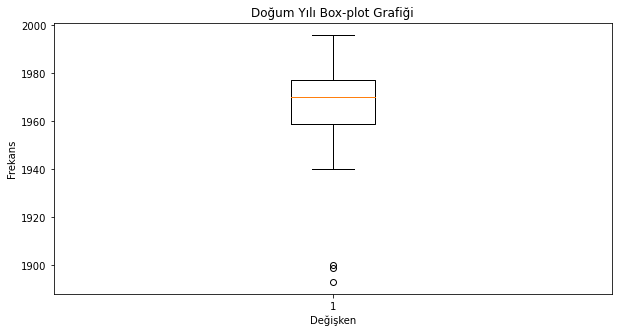

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

figure = plt.figure(figsize=(10,5))

plt.boxplot(temiz_veri['Year_Birth'])
plt.title('Doğum Yılı Box-plot Grafiği')
plt.xlabel('Değişken')
plt.ylabel('Frekans')
plt.show()

In [76]:
print(temiz_veri.columns)

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_LabelEncoded'],
      dtype='object')


In [26]:
pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


K-Means algoritması, hızlı, basit ve ölçeklenebilir bir kümeleme yöntemidir. Veri kümesini belirli sayıda kümeye ayırarak benzer özelliklere sahip veri noktalarını gruplar. Bu yöntem, veri analizi ve desen tanıma gibi uygulamalarda sıklıkla tercih edilir çünkü verilerin yapısını anlamamıza ve farklı grupları belirlememize olanak tanır. Bu yüzden bunun kullanımı uygun görülmüştür.

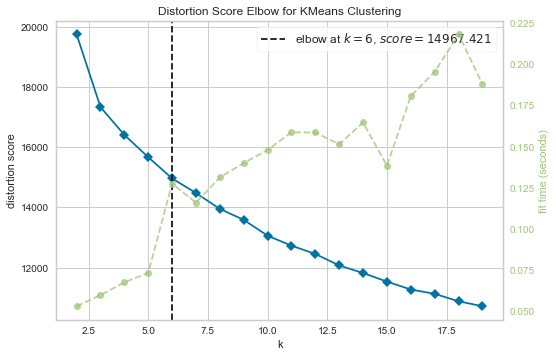

Cluster                            0            1            2            3  \
Year_Birth        count   460.000000   242.000000   498.000000   393.000000   
                  mean   1969.078261  1967.487603  1973.122490  1964.689567   
                  std      12.272787    13.414933    10.445752    10.834107   
                  min    1893.000000  1941.000000  1945.000000  1943.000000   
                  25%    1960.000000  1956.250000  1968.000000  1956.000000   
...                              ...          ...          ...          ...   
NumWebVisitsMonth min       0.000000     0.000000     1.000000     0.000000   
                  25%       5.000000     1.000000     5.000000     4.000000   
                  50%       6.000000     2.000000     7.000000     5.000000   
                  75%       7.000000     3.000000     8.000000     6.000000   
                  max      20.000000     8.000000    17.000000     9.000000   

Cluster                            4            5  

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from yellowbrick.cluster import KElbowVisualizer


features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cerceve[features])


kmeans = KMeans(random_state=42)


visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(scaled_data)
visualizer.show()


optimal_k = visualizer.elbow_value_


kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)


cerceve['Cluster'] = kmeans.labels_


cluster_summary = cerceve.groupby('Cluster')[features].describe().transpose()
print(cluster_summary)


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_cerceve = pd.DataFrame(cluster_centers, columns=features)
print(cluster_centers_cerceve)


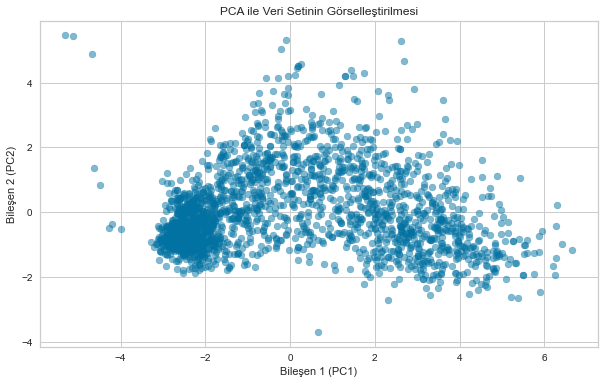

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
            'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(temiz_veri[features])


pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)


pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])


plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA ile Veri Setinin Görselleştirilmesi')
plt.xlabel('Bileşen 1 (PC1)')
plt.ylabel('Bileşen 2 (PC2)')
plt.grid(True)
plt.show()


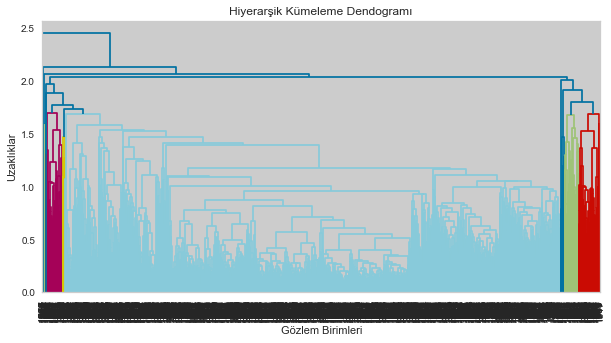

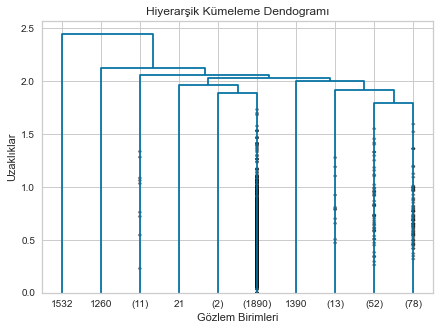

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import MinMaxScaler



numerical_cols = temiz_veri.select_dtypes(include=['float64', 'int64']).columns
df_numeric = temiz_veri[numerical_cols]

scaler = MinMaxScaler((0, 1))
df_scaled = scaler.fit_transform(df_numeric)

hc_average = linkage(df_scaled, "average")


plt.figure(figsize=(10, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           leaf_font_size=10)
plt.show()


plt.figure(figsize=(7, 5))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_average,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.show()



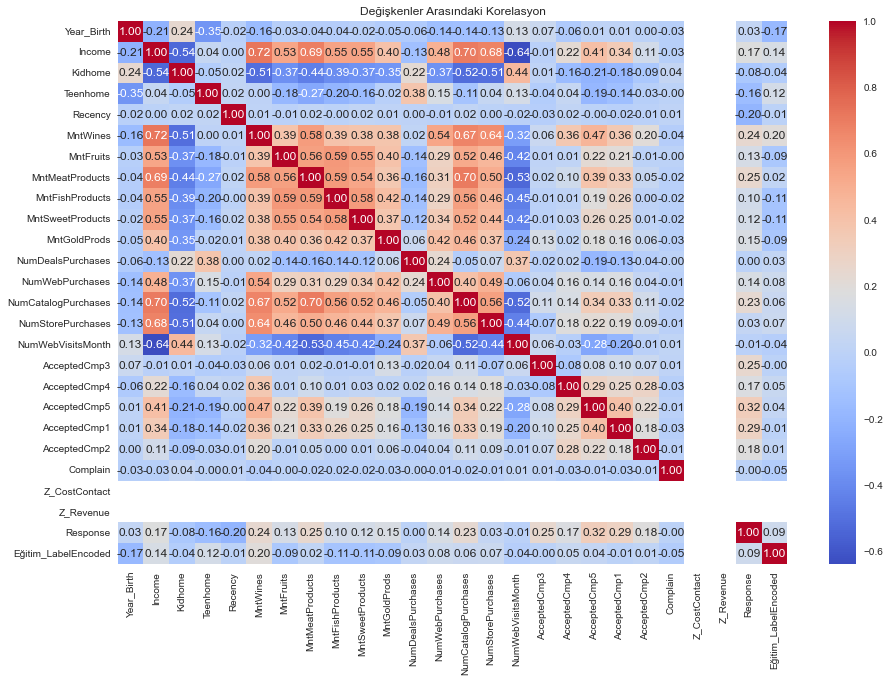

In [35]:
import pandas as pd


correlation_matrix = temiz_veri.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Değişkenler Arasındaki Korelasyon')
plt.show()


Yukarıdaki korelasyon matrisinde bütün değişkenlerin birbiri arasındaki ilişki ve bunun gücü gösterilmek istenmiştir. Kırmızı ve bu tonun türevleri pozitifve doğrusal ilişkiyi temsil etmektedir ve bu renk skalasında açıktan koyuya doğru güç artmaktadır. Aynı açıklama mavi ve bu tonun türevleri içinde geçerlidir fakat burada ilişki negatif ve ters yönlüdür.

Pozitif ve doğrusal ilişkide en güçlü ilişkiye sahip değişken Income ile MntWines değişkenleri arasındaki 0.72 yani %72 oranına sahip güçlü bir ilişkidir.

Negatif ve ters yönlü ilişkide en güçlü ilişkiye sahip değişken Income ile NumWebVisitsMonth değişkenleri arasındaki -0.64'lük %64'lük ters oranda orta güçlü bir ilişkidir.

In [38]:

demografik_veriler = temiz_veri[['Year_Birth', 'Education', 'Marital_Status', 'Income']]


demografik_ozet = demografik_veriler.describe(include='all')

print("Demografik Verilerin İstatistiksel Özeti:")
print(demografik_ozet)


Demografik Verilerin İstatistiksel Özeti:
         Year_Birth   Education Marital_Status         Income
count   2050.000000        2050           2050    2050.000000
unique          NaN           5              8            NaN
top             NaN  Graduation        Married            NaN
freq            NaN        1027            792            NaN
mean    1968.772683         NaN            NaN   51697.657561
std       11.980667         NaN            NaN   20588.309708
min     1893.000000         NaN            NaN    1730.000000
25%     1959.000000         NaN            NaN   35685.000000
50%     1970.000000         NaN            NaN   51411.500000
75%     1977.000000         NaN            NaN   68046.750000
max     1996.000000         NaN            NaN  113734.000000


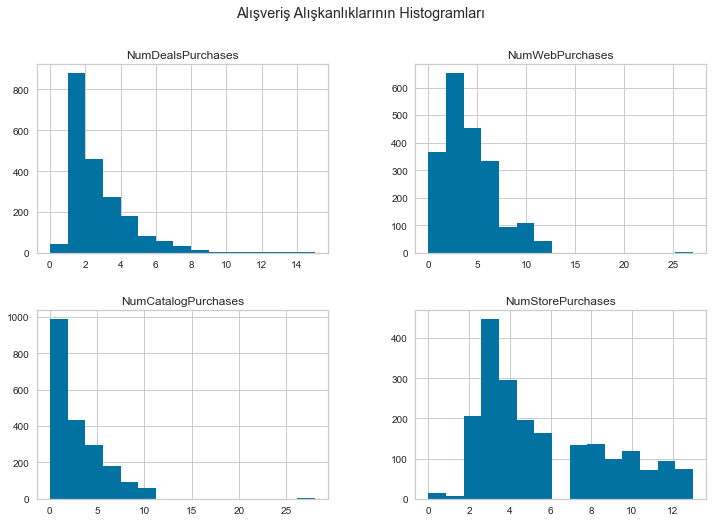

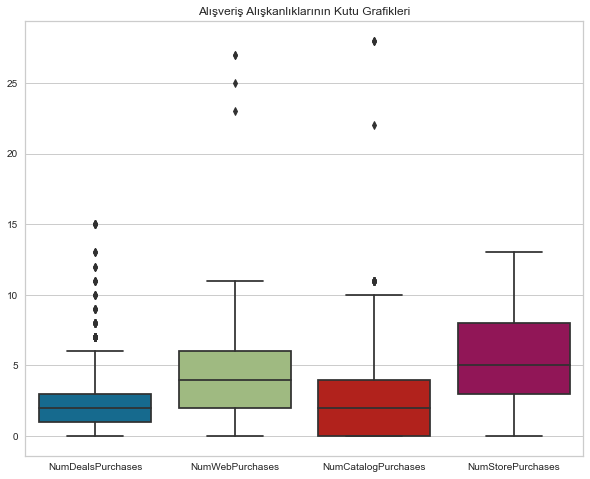

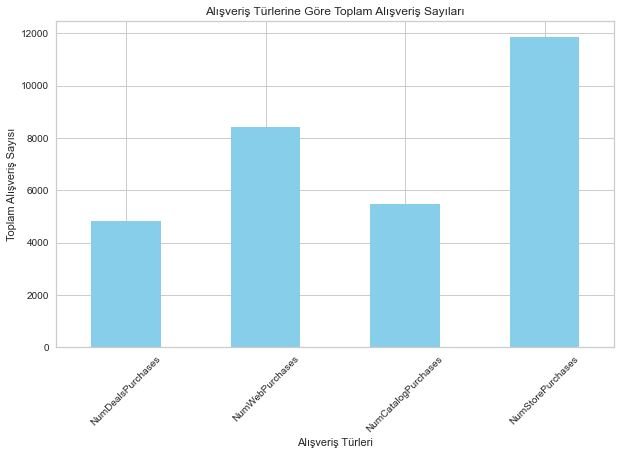

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

alisveris_aliskanliklari = cerceve[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

alisveris_aliskanliklari.hist(figsize=(12, 8), bins=15)
plt.suptitle('Alışveriş Alışkanlıklarının Histogramları')
plt.show()


plt.figure(figsize=(10, 8))
sns.boxplot(data=alisveris_aliskanliklari)
plt.title('Alışveriş Alışkanlıklarının Kutu Grafikleri')
plt.show()


toplam_alisverislar = alisveris_aliskanliklari.sum()

plt.figure(figsize=(10, 6))
toplam_alisverislar.plot(kind='bar', color='skyblue')
plt.title('Alışveriş Türlerine Göre Toplam Alışveriş Sayıları')
plt.xlabel('Alışveriş Türleri')
plt.ylabel('Toplam Alışveriş Sayısı')
plt.xticks(rotation=45)
plt.show()


In [55]:

alisveris_verileri = temiz_veri[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]


alisveris_ozet = alisveris_verileri.describe(include='all')


print("Alışveriş Verilerinin İstatistiksel Özeti:")
print(alisveris_ozet)

temiz_veri['ToplamAlisveris'] = temiz_veri[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
toplam_alisveris_ozet = temiz_veri['ToplamAlisveris'].describe()
print("Toplam Alışveriş Verilerinin İstatistiksel Özeti:")
print(toplam_alisveris_ozet)


Alışveriş Verilerinin İstatistiksel Özeti:
       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2050.000000      2050.000000          2050.000000   
mean            2.331707         4.112683             2.632683   
std             1.902253         2.793265             2.795661   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  
count        2050.000000  
mean            5.790244  
std             3.229607  
min             0.000000  
25%             3.000000  
50%             5.000000  
75%             8.000000  
max            13.000000  
Toplam Alışveriş Verilerinin İstatistiksel Özeti:
count    2050.000000
mean       14.867317
std         7.604098
min   

Müşterinin Toplam Alışveriş Sayısı: 30478


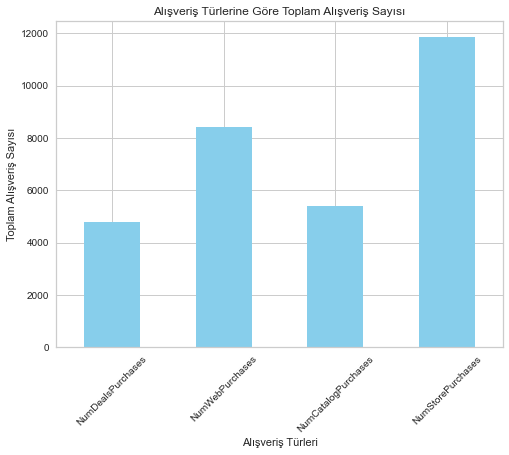

In [57]:
import matplotlib.pyplot as plt


temiz_veri['ToplamAlisveris'] = temiz_veri[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

toplam_alisveris = temiz_veri['ToplamAlisveris'].sum()
print("Müşterinin Toplam Alışveriş Sayısı:", toplam_alisveris)


alisveris_turleri = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
toplam_alisverisler = temiz_veri[alisveris_turleri].sum()

plt.figure(figsize=(8, 6))
toplam_alisverisler.plot(kind='bar', color='skyblue')
plt.title('Alışveriş Türlerine Göre Toplam Alışveriş Sayısı')
plt.xlabel('Alışveriş Türleri')
plt.ylabel('Toplam Alışveriş Sayısı')
plt.xticks(rotation=45)
plt.show()


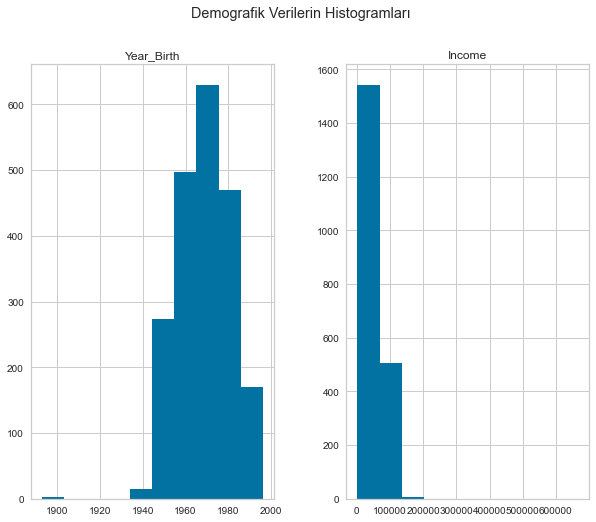

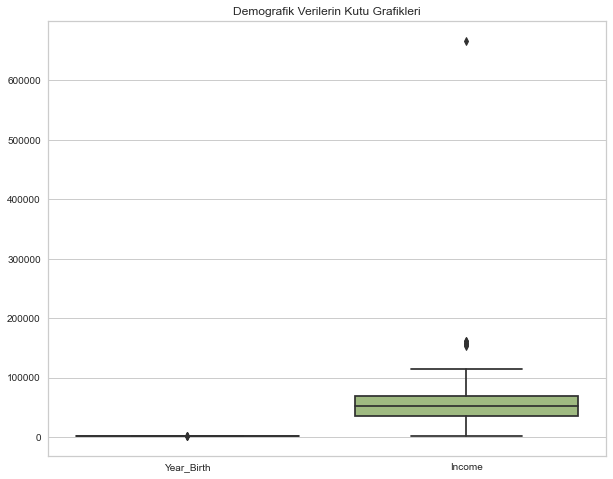

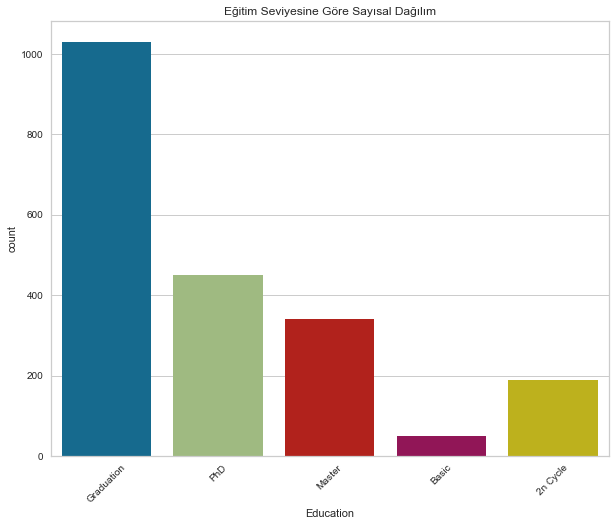

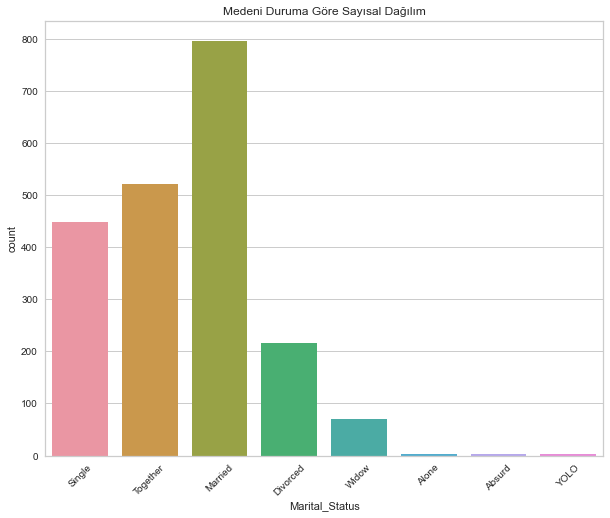

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


demografik_veriler = cerceve[['Year_Birth', 'Education', 'Marital_Status', 'Income']]


demografik_veriler.hist(figsize=(10, 8))
plt.suptitle('Demografik Verilerin Histogramları')
plt.show()


plt.figure(figsize=(10, 8))
sns.boxplot(data=demografik_veriler)
plt.title('Demografik Verilerin Kutu Grafikleri')
plt.show()


plt.figure(figsize=(10, 8))
sns.countplot(data=cerceve, x='Education')
plt.title('Eğitim Seviyesine Göre Sayısal Dağılım')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=cerceve, x='Marital_Status')
plt.title('Medeni Duruma Göre Sayısal Dağılım')
plt.xticks(rotation=45)
plt.show()



In [59]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
temiz_veri_encoded = temiz_veri.copy() 
for column in temiz_veri_encoded.columns:
    temiz_veri_encoded[column] = label_encoder.fit_transform(temiz_veri_encoded[column])


kmeans = KMeans(n_clusters=4)
kmeans.fit(temiz_veri_encoded)


print("Küme Merkezleri:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Küme {i+1}: {center}")


Küme Merkezleri:
Küme 1: [ 3.54828179e+01  2.12714777e+00  3.68556701e+00  2.76678694e+02
  8.29896907e-01  2.92096220e-01  4.81941581e+01  2.20274914e+01
  5.22680412e+00  2.02628866e+01  6.97766323e+00  5.28522337e+00
  1.57628866e+01  2.06701031e+00  1.95876289e+00  4.29553265e-01
  2.95189003e+00  6.86769759e+00  8.07560137e-02  3.43642612e-03
 -5.55111512e-17  1.38777878e-17 -8.67361738e-18  1.03092784e-02
  0.00000000e+00  0.00000000e+00  1.08247423e-01  2.12714777e+00
  6.65584192e+01  1.67697595e+00  6.48109966e+00]
Küme 2: [2.73153348e+01 2.49676026e+00 3.71274298e+00 1.28036069e+03
 1.79265659e-01 7.79697624e-01 4.91706263e+01 3.73799136e+02
 3.40863931e+01 1.57034557e+02 3.77688985e+01 3.36954644e+01
 6.21079914e+01 3.11663067e+00 6.16630670e+00 3.65226782e+00
 8.35853132e+00 4.91360691e+00 6.04751620e-02 1.29589633e-01
 1.94384449e-02 3.45572354e-02 2.15982721e-02 1.07991361e-02
 0.00000000e+00 0.00000000e+00 1.07991361e-01 2.49676026e+00
 5.21388769e+02 2.52699784e+00 2.03

Bu çıktı, KMeans algoritmasının dört küme merkezi için bulduğu özelliklerin ortalamalarını içerir. Her bir satır bir küme merkezini temsil eder.

- Her satır, bir kümenin merkezini temsil eder.
- Her sütun, bir özelliği temsil eder. Örneğin, 'Ortalama eğitim seviyesi', 'Ortalama medeni hal', 'Ortalama doğum yılı' ve 'Ortalama gelir'.

Yorumlamalar:

- Küme 1: Ortalama eğitim seviyesi düşük, gelir düşük ancak alışveriş sıklığı yüksek.
- Küme 2: Ortalama eğitim seviyesi yüksek, gelir yüksek, webden yapılan alışverişler önemli.
- Küme 3: Ortalama eğitim seviyesi ve gelir orta düzeyde, doğum yılı daha yeni, katalogdan yapılan alışverişler önemli.
- Küme 4: Ortalama eğitim seviyesi ve gelir yüksek, alışveriş sıklığı ve harcamaları da yüksek.


In [49]:
from sklearn.cluster import KMeans


temiz_veri['ToplamGider'] = temiz_veri[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


kumeleme_verisi = temiz_veri[['Income', 'ToplamGider']]


kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(kumeleme_verisi)


kume_merkezleri = kmeans.cluster_centers_
print("Küme Merkezleri:")
print(kume_merkezleri)

temiz_veri['Kume_Numarasi'] = kmeans.labels_


print("\nHer Bir Kümenin Gözlem Sayısı:")
print(temiz_veri['Kume_Numarasi'].value_counts())

Küme Merkezleri:
[[7.87232130e+04 1.37242799e+03]
 [4.06738252e+04 2.01590909e+02]
 [2.27476929e+04 7.36624365e+01]
 [5.91229019e+04 7.13038917e+02]]

Her Bir Kümenin Gözlem Sayısı:
3    591
1    572
0    493
2    394
Name: Kume_Numarasi, dtype: int64


Verilerin dört farklı kümeye ayrıldığını görebiliyoruz. Her bir küme, ortalama gelir ve alışveriş miktarı açısından farklı özelliklere sahiptir. 

- İlk küme (Küme 0) ortalama gelir bakımından diğerlerine göre daha düşüktür ancak alışveriş miktarı düşük değildir. Bu küme, düşük gelire sahip olmasına rağmen alışveriş yapmaya eğilimli bir grup olabilir.

- İkinci küme (Küme 1), ortalama gelir bakımından orta düzeydedir ve ortalama alışveriş miktarı düşüktür. Bu küme, orta gelire sahip ancak daha az alışveriş yapan bir grup olabilir.

- Üçüncü küme (Küme 2), diğerlerine göre en düşük ortalama gelire sahiptir ancak alışveriş miktarı daha yüksektir. Bu küme, düşük gelire sahip olmasına rağmen alışveriş yapmaya daha fazla eğilimli bir grup olabilir.

- Dördüncü küme (Küme 3), ortalama gelir ve alışveriş miktarı bakımından en yüksektir. Bu küme, yüksek gelire sahip ve daha fazla alışveriş yapan bir grup olabilir.

Sonuç olarak, dört farklı küme, farklı gelir seviyelerine ve alışveriş alışkanlıklarına sahip müşteri segmentlerini temsil ediyor gibi görünmektedir. Bu bilgi, pazarlama stratejilerini belirlerken ve müşterilere özel hizmetler sunarken faydalı olabilir.